DEEP LEARNING

LAB 4

PRANSHU PARATE

202211063

Dog vs Cat Dataset


In [ ]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras_preprocessing.image import load_img
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
from keras_preprocessing.image import img_to_array
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

def process_image(img) -> np.array:
    #img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img
# define location of dataset
folder = "C:/Users/Dell/Downloads/dog vs cats/train"
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
 # determine class
 output = 0.0
 if file.startswith('dog'):
     output = 1.0
 # load image
 photo = Image.open(folder +"/" + file ,'r')
 # convert to numpy array
 photo = process_image(photo)
 # store
 photos.append(photo)
 labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(25000, 9216) (25000,)


In [ ]:
#printing the shape of photos and labels set
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(25000, 9216) (25000,)


In [ ]:
dataset_home = 'C:/Users/Dell/Downloads/dog vs cats/'
subdirs = ['train/', 'test1/']
for subdir in subdirs:
 # create label subdirectories
 labeldirs = ['dogs/', 'cats/']
 for labldir in labeldirs:
     newdir = dataset_home + subdir + labldir
     os.makedirs(newdir, exist_ok=True)

In [ ]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = 'train/'
 if random() < val_ratio:
     dst_dir = 'test1/'
 if file.startswith('cat'):
     dst = dataset_home + dst_dir + 'cats/'  + file
     copyfile(src, dst)
 elif file.startswith('dog'):
     dst = dataset_home + dst_dir + 'dogs/'  + file
     copyfile(src, dst)

In [ ]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [ ]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - dog or a cat
    processed['class'] = folder.parts[-1]
    
    return processed

In [ ]:
train_cat = process_folder(folder=pathlib.Path.cwd().joinpath("C:/Users/Dell/Downloads/dog vs cats/train/cats"))
train_dog = process_folder(folder=pathlib.Path.cwd().joinpath("C:/Users/Dell/Downloads/dog vs cats/train/dogs"))
train_set = pd.concat([train_cat, train_dog], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

# Test set
test_cat = process_folder(folder=pathlib.Path.cwd().joinpath("C:/Users/Dell/Downloads/dog vs cats/test1/cats"))
test_dog = process_folder(folder=pathlib.Path.cwd().joinpath("C:/Users/Dell/Downloads/dog vs cats/test1/dogs"))
test_set = pd.concat([test_cat, test_dog], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)

In [ ]:
train_set = shuffle(train_set).reset_index(drop=True)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.545098,0.556863,0.576471,0.592157,0.584314,0.552941,0.521569,0.521569,0.619608,0.623529,...,0.501961,0.584314,0.423529,0.294118,0.372549,0.443137,0.439216,0.403922,0.368627,dogs
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.898039,0.976471,0.952941,0.972549,0.913725,0.894118,0.890196,0.937255,0.921569,cats
2,0.180392,0.180392,0.180392,0.176471,0.184314,0.192157,0.188235,0.184314,0.149020,0.184314,...,0.658824,0.654902,0.650980,0.654902,0.654902,0.662745,0.662745,0.662745,0.650980,dogs
3,0.254902,0.396078,0.541176,0.505882,0.380392,0.384314,0.427451,0.450980,0.529412,0.541176,...,0.964706,0.600000,0.211765,0.250980,0.274510,0.266667,0.200000,0.129412,0.129412,cats
4,0.533333,0.549020,0.549020,0.541176,0.537255,0.517647,0.509804,0.545098,0.600000,0.611765,...,0.329412,0.333333,0.298039,0.301961,0.309804,0.239216,0.074510,0.047059,0.035294,dogs


In [ ]:
#splitting of train and test set
from sklearn.model_selection import train_test_split

X_set = train_set.drop('class', axis=1)
y_set = train_set['class']
X_train, X_valid,y_train, y_valid = train_test_split(X_set,y_set ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
  


X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train.factorize()[0], num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid.factorize()[0], num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test.factorize()[0], num_classes=2)

In [ ]:
#building the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
#compile the model
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)
#fitting he model
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_valid, y_valid)
    
)

Epoch 1/30
110/110 [==============================] - 27s 228ms/step - loss: 1.1324 - accuracy: 0.5088 - val_loss: 0.6845 - val_accuracy: 0.5591
Epoch 2/30
110/110 [==============================] - 28s 252ms/step - loss: 0.6834 - accuracy: 0.5539 - val_loss: 0.6721 - val_accuracy: 0.5784
Epoch 3/30
110/110 [==============================] - 30s 275ms/step - loss: 0.6654 - accuracy: 0.5947 - val_loss: 0.6583 - val_accuracy: 0.6126
Epoch 4/30
110/110 [==============================] - 28s 255ms/step - loss: 0.6613 - accuracy: 0.5999 - val_loss: 0.6611 - val_accuracy: 0.6066
Epoch 5/30
110/110 [==============================] - 33s 303ms/step - loss: 0.6581 - accuracy: 0.6042 - val_loss: 0.6636 - val_accuracy: 0.6073
Epoch 6/30
110/110 [==============================] - 39s 349ms/step - loss: 0.6550 - accuracy: 0.6117 - val_loss: 0.6638 - val_accuracy: 0.6233
Epoch 7/30
110/110 [==============================] - 37s 336ms/step - loss: 0.6507 - accuracy: 0.6184 - val_loss: 0.6592 - val_ac

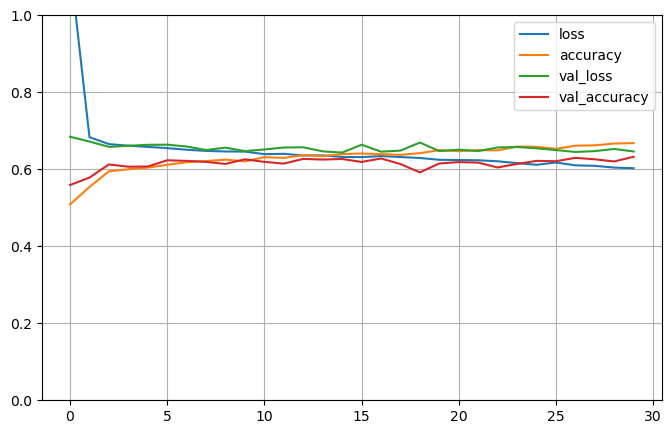

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#evaluation of accuracy and loss
model.evaluate(X_test, y_test)

197/197 [==============================] - 6s 31ms/step - loss: 0.6679 - accuracy: 0.6105


[0.6679239869117737, 0.6105029582977295]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 157ms/step


array([[0.71, 0.29],
       [0.52, 0.48],
       [0.56, 0.44]], dtype=float32)

In [ ]:
classes_x=np.argmax(y_proba,axis=1)
print(classes_x)

[0 0 0]
